In [ ]:
# Red Wine Prediction Project

In [ ]:
Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
Loading Dataset

In [32]:
wine=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
wine.sample(1000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1546,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5
863,7.2,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,5
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,4
322,7.8,0.620,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5
420,9.5,0.560,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
789,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,5
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5
1432,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6


In [35]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
Findings:- Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

There is a big gap between 75% and max values of residual sugar column
There is a big gap between 75% and max values of free sulfur dioxide column
There is a huge gap between 75% and max value of total sulfur dioxide column
All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.


In [ ]:
#Finding Null Values

In [37]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [38]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
# Exploratory data analysis 📉 & data visualization 📊

In [ ]:
Countplot:

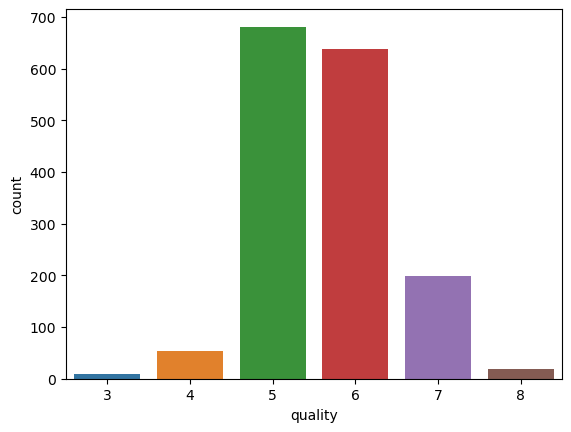

In [44]:
sns.countplot(x='quality', data=data)
plt.show()

In [ ]:
In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

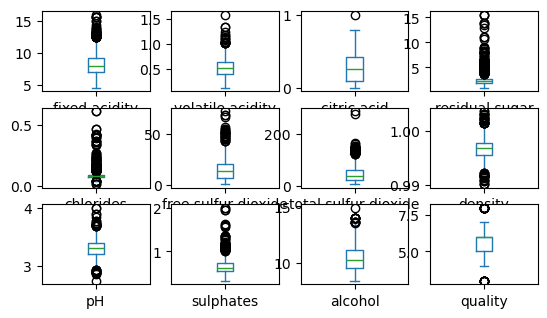

In [51]:
wine.plot(kind = 'box', subplots = True, layout =(4,4),sharex = False)
plt.show()

In [ ]:
With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

In [57]:
wine.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [ ]:
What can we see from this statistic?

The average value of fixed acidity is 8.31, the highest value is 15.9
The average value of volatile acidity is 0.52, the highest value is 1.58
The average value of citric acid is 0.27, the highest value is 1
The average value of residual sugar is 2.53, the highest value is 15.5
The average value of chlorides is 0.08, the highest value is 0.61
The average value of free sulfur dioxide is 15.87, the highest value is 72
The average value of total sulfur dioxide is 46.46, the highest value is 289
The average value of density is 0.99, the highest value is 1
The average value of pH is 3.31, the highest value is 4.01
The average value of sulphates is 0.65, the highest value is 2
The average value of alcohol is 10.42, the highest value is 14.90
The average value of quality is 5.63, the highest value is 8

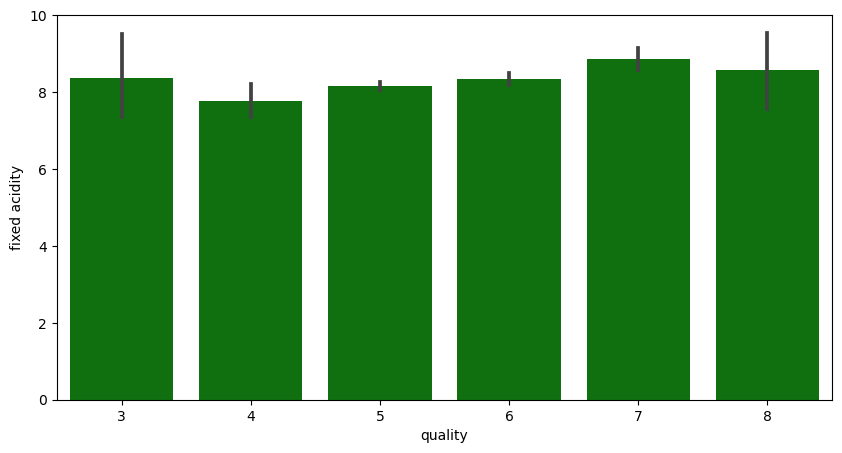

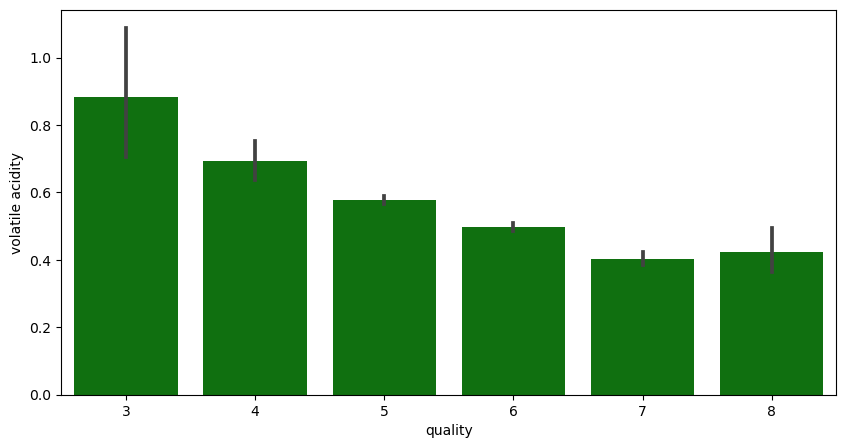

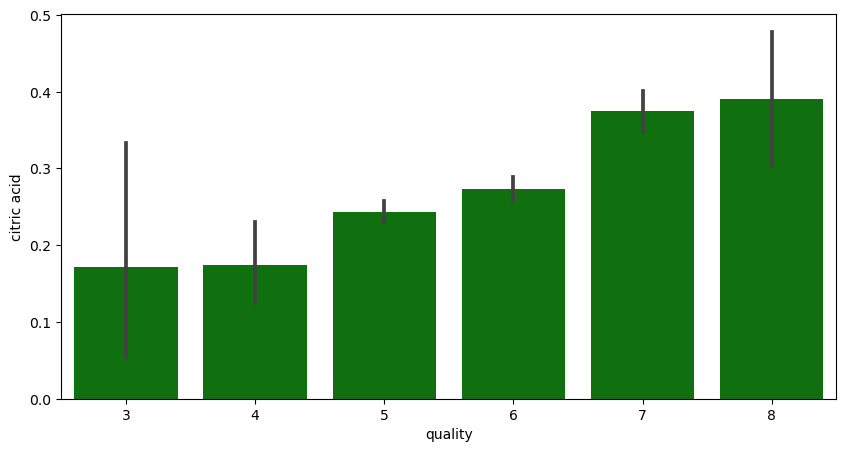

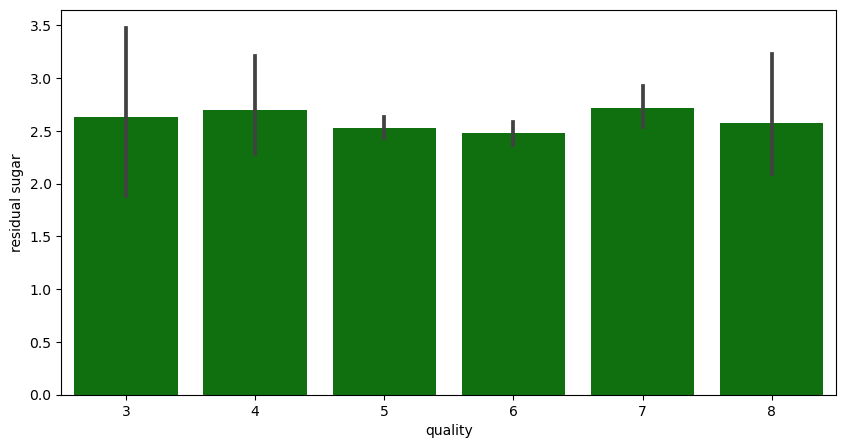

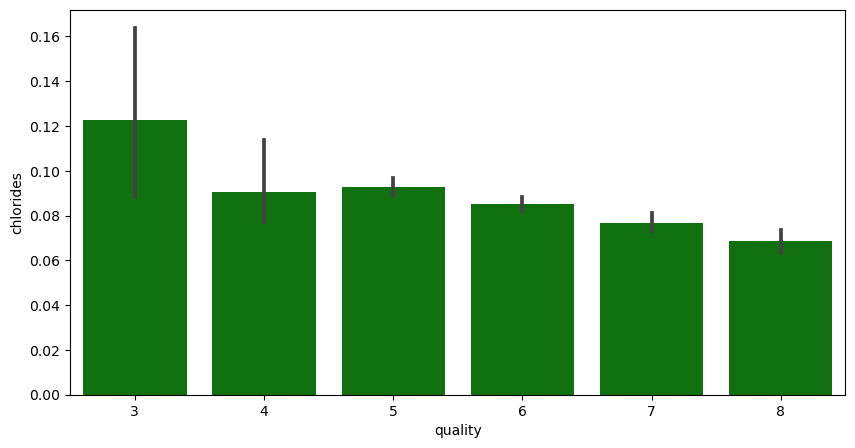

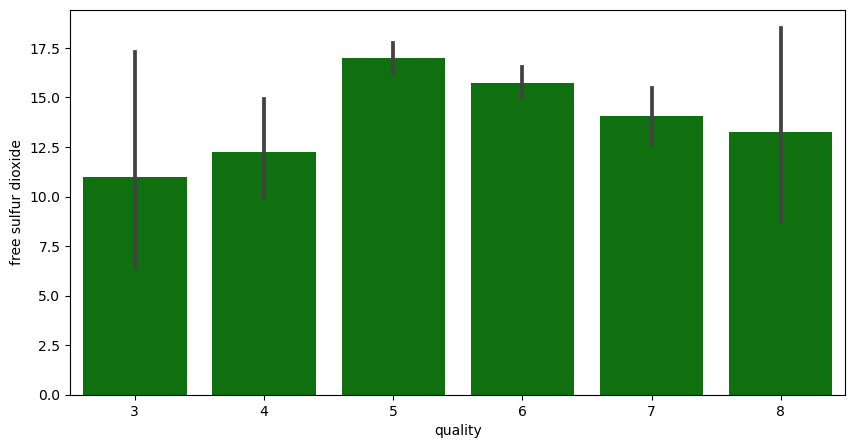

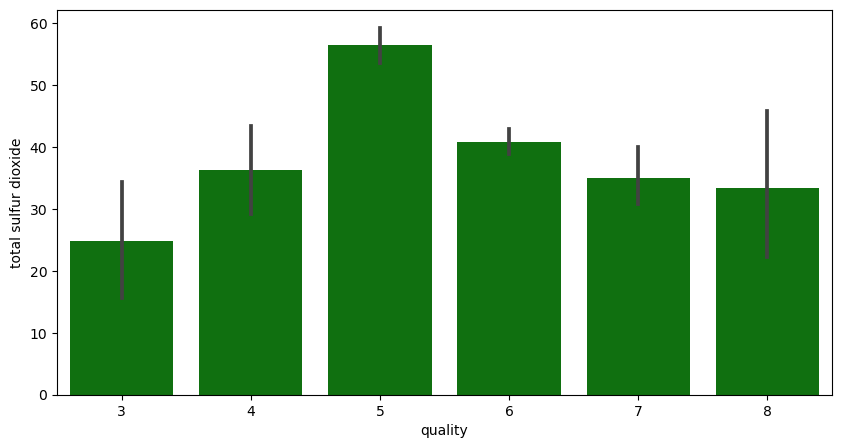

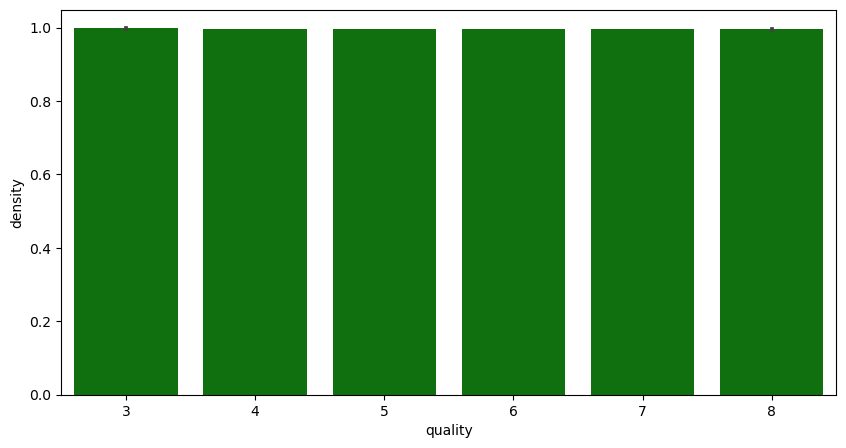

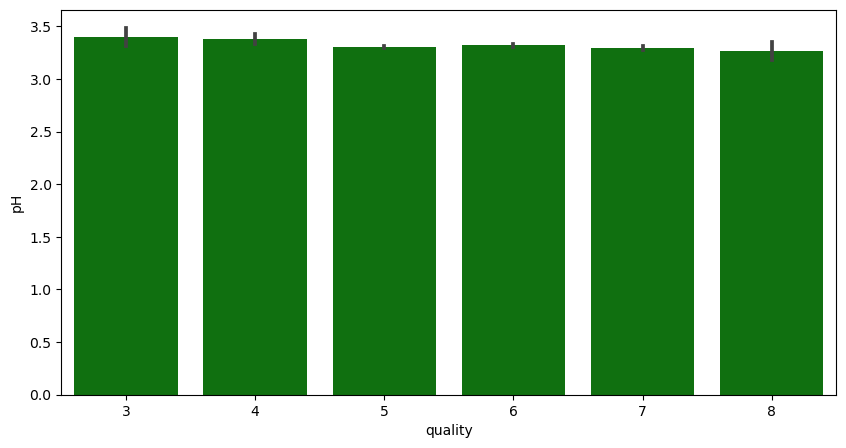

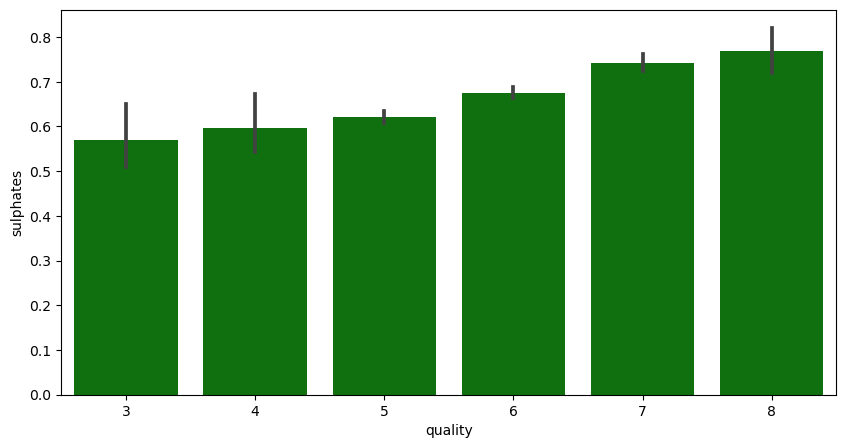

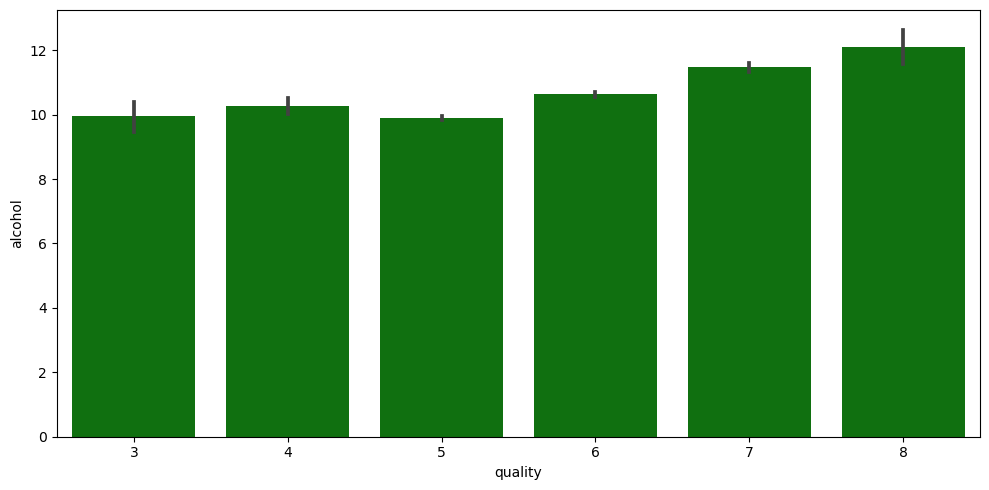

In [90]:
index=0
labels = data ['quality']
features = data.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=data, color="green")
plt.tight_layout()
plt.show()

In [ ]:
Observations:--

fixed acidity vs quality - no fixed pattern
volatile acidity vs quality - there is a decreasing trend
citric acid vs quality - there is an increasing trend
residual sugar vs quality - no fixed pattern
chlorides vs quality - there is a decreasing trend
free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
density vs quality - no pattern at all
pH vs quality - no pattern at all
sulphates vs quality - there is an increasing trend
alcohol vs quality - there is an increasing trend
So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

In [ ]:
# Correlation using heatmap

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

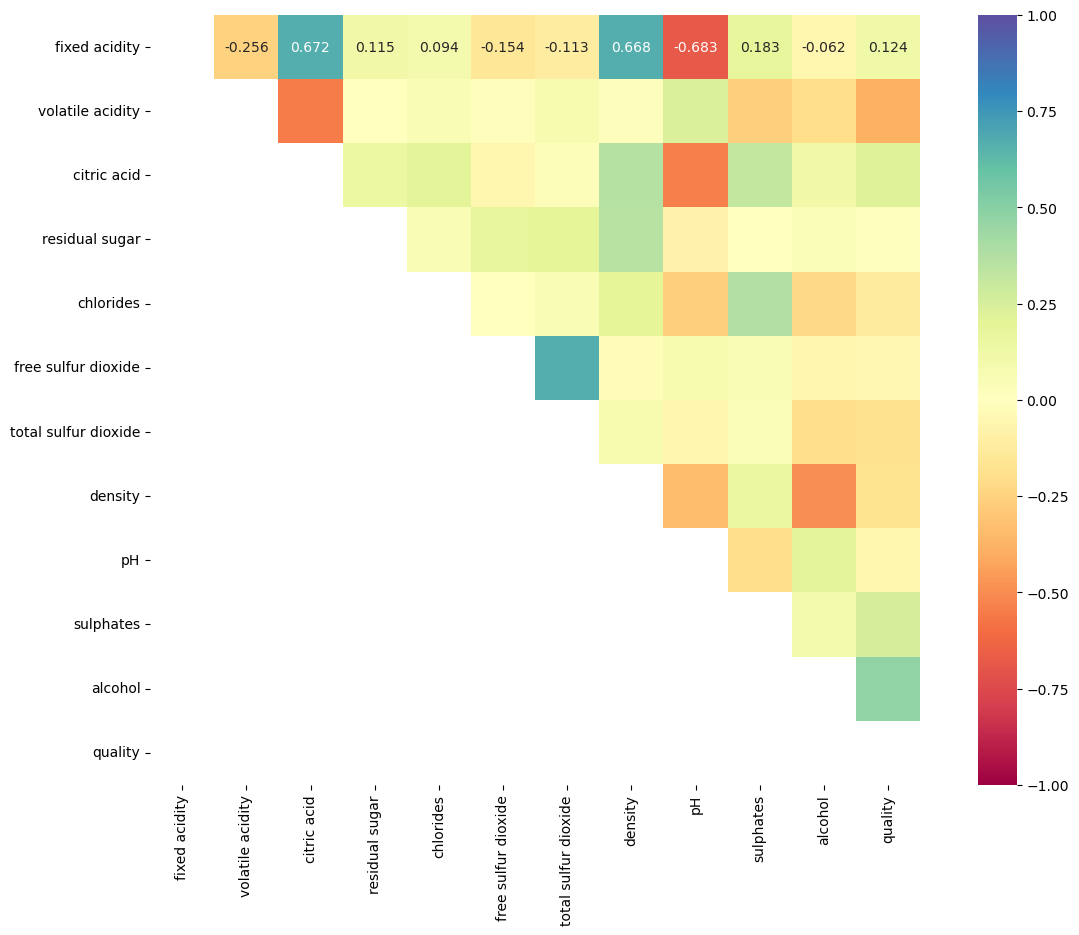

In [93]:
lower_triangle = np.tril(data.corr())
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xlabels(fontsize=12)
plt.ylabels(fontsize=12)
plt.show()


In [ ]:
I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

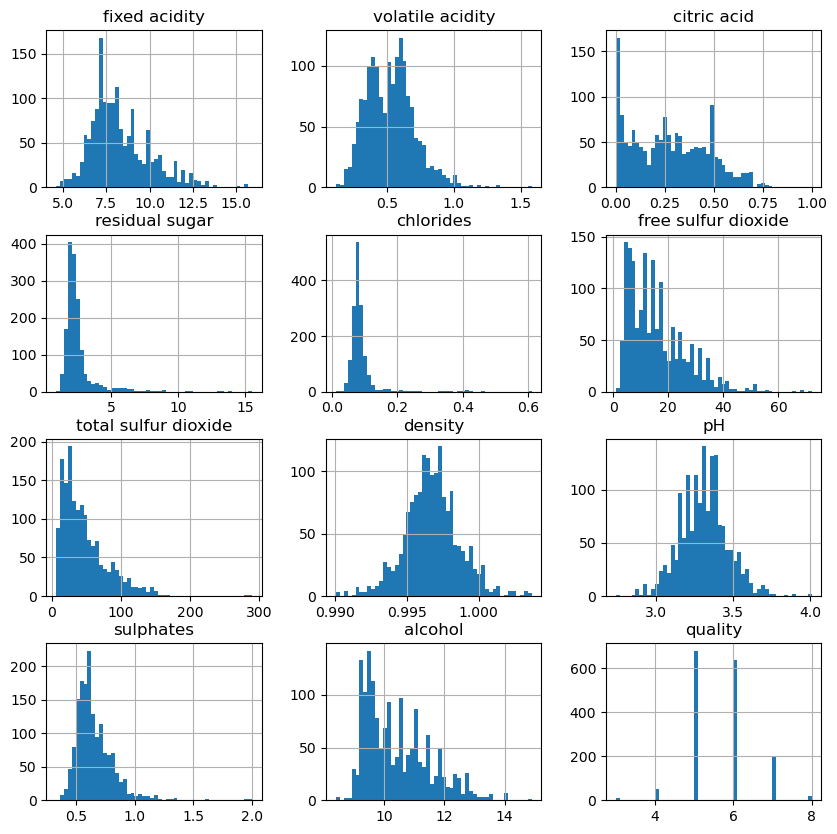

In [95]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
# Feature Selection

In [97]:
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1491,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
931,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
1310,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5
1173,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6
909,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
432,11.9,0.370,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.8,6
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6,7
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5


In [99]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [101]:
# If Wine quality is 7 or above then we will consider as good quality wine and the remaining is not good one.

wine['goodquality']=[1 if x >=7 else 0 for x in wine['quality']]
wine.sample(10)                     

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
561,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,0
1029,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7,1
531,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5,0
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4,0
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5,5,0
1371,7.5,0.58,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6,0
1022,7.0,0.51,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5,0
759,8.8,0.42,0.21,2.5,0.092,33.0,88.0,0.99823,3.19,0.52,9.2,5,0
294,13.3,0.34,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6,0
359,12.6,0.38,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6,0


In [ ]:
As per my observation, only one data having 'Good Quality' of wine.

In [104]:
# Seperate dependent and independent variables

X = wine.drop(['quality', 'goodquality'],axis = 1)
Y = wine['goodquality']

In [107]:
# Total number of good vs bad wines samples
wine['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [108]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [110]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [ ]:
# AUC and ROC curve

In [1]:
info= data.plot_roc_curve(Final_Model, X_test, Y_test)
info.figure_.suptitle("ROC Curve")
plt.show()

NameError: name 'data' is not defined